In [6]:
import numpy as np

import pathlib

import time

import matplotlib.pyplot as plt


In [2]:


def select_z(z_real, zmin_sel, zmax_sel):
    selection = (z_real > zmin_sel) & (z_real < zmax_sel)
    return z_real[selection]

def get_nz(redshifts: np.ndarray, weights: np.ndarray = None, nbins: int = 20):
    galaxyzbins = np.linspace(redshifts.min(), redshifts.max(), nbins)
    #CREATE dn/dz
    histog = np.histogram(redshifts, galaxyzbins, weights = weights)
    z, nz = histog[1], histog[0]
    z = (z[1:]+z[:-1])/2.
    return z, nz


In [16]:
def get_norm_nz(z, nz):
    total_number = np.trapz(nz, z)
    nznorm = nz/total_number
    return nznorm

In [3]:


source_dir = pathlib.Path('/global/cscratch1/sd/omard/scatteringtfms/sims/')
halo_file =  source_dir/'halo_nbody.ascii'
start = time.time()
halos = np.loadtxt(halo_file)
print(f'Took {time.time()-start} seconds to read halo file.')


Took 30.333065509796143 seconds to read halo file.


In [4]:
direc = '/global/homes/o/omard/actxdes/pipeline/measure/explore/output/'
z, nz = np.loadtxt(direc+'galaxy_z_nz_0.2-0.4.txt', unpack = True)

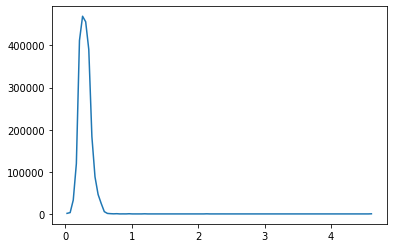

In [7]:
plt.plot(z, nz)

In [10]:
total_number = np.trapz(nz, z)
nznorm = nz/total_number

In [11]:
zs = halos[:, 0]

#Here, you try to get the desired nz from nznorm, at the zs of the original halo catalog
weights = np.interp(zs, z, nznorm)

from numpy import random as nprnd

rng = nprnd.default_rng()
sumweights = sum(weights)


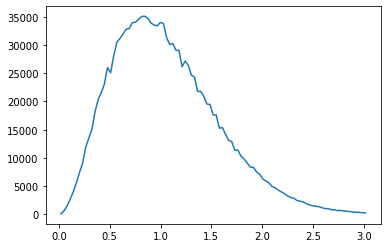

In [23]:
zz, nzz  = get_nz(redshifts = zs, nbins = 100)
plt.plot(zz, nzz)
np.savetxt('sehgalconfig/sehgalnz.txt', np.c_[zz, nzz])

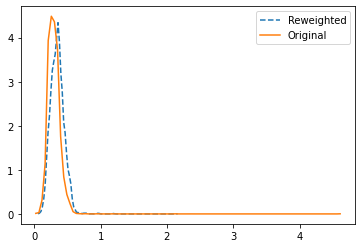

In [19]:

#Total number of galaxies for your bin, might be the one coming from real data, or an expected one from number density over your area
Ngalaxies_for_bin = int(total_number)

indices = rng.choice(len(zs), Ngalaxies_for_bin,
              p = weights/sumweights, replace = False)

draw = zs[indices]

drawzs, drawnz = get_nz(redshifts = draw, nbins = 100)
plt.plot(drawzs, get_norm_nz(drawzs, drawnz ), ls = '--', label = 'Reweighted')
plt.plot(z, nznorm, label = 'Original')
plt.legend()